# Modelling the Critical Temperature for the Superconductivity of Different materials

I would like to model the critical temperature of different materials by using their physical properties 
like number_of_elements mean_atomic_mass wtd_mean_atomic_mass and more. Superconductivity is the property
when direct current passes through a conductive material without loss in energy (zero resistance) below a 
critical temperature. It was discovered 100 years ago. However, the first theory explaning the effect 
was proposed in 1957, receiving Nobel Prize. It is usually applied to materials to get very strong magnets.
Applications include MRI machines and CERN accelerators. 
This model is going to help to identify the critical temperatures of computationally designed materials.
As a result, materials with critical temperature being close to desired values will be identified and
sent to experimental study. Hence, this work can reduce the experimental efforts for identifying critical temperature.

## Import Data and Get Info

In [210]:
import pandas as pd

# Load the uploaded dataset
file_path = 'properties.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

(   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
 0                   4         88.944468             57.862692   
 1                   5         92.729214             58.518416   
 2                   4         88.944468             57.885242   
 3                   4         88.944468             57.873967   
 4                   4         88.944468             57.840143   
 
    gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
 0          66.361592              36.116612             1.181795   
 1          73.132787              36.396602             1.449309   
 2          66.361592              36.122509             1.181795   
 3          66.361592              36.119560             1.181795   
 4          66.361592              36.110716             1.181795   
 
    wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
 0                 1.062396          122.90607              31.794921   
 1                 1.057755          122

In [212]:
display(data)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


## Feature Engineering: Correlation

Firstly, I am gonna plot correlation matrix to see if we have multicollinearity. Since we have 82 features and those features contain physically related quantities we are likely to have highly correlated feature pairs.

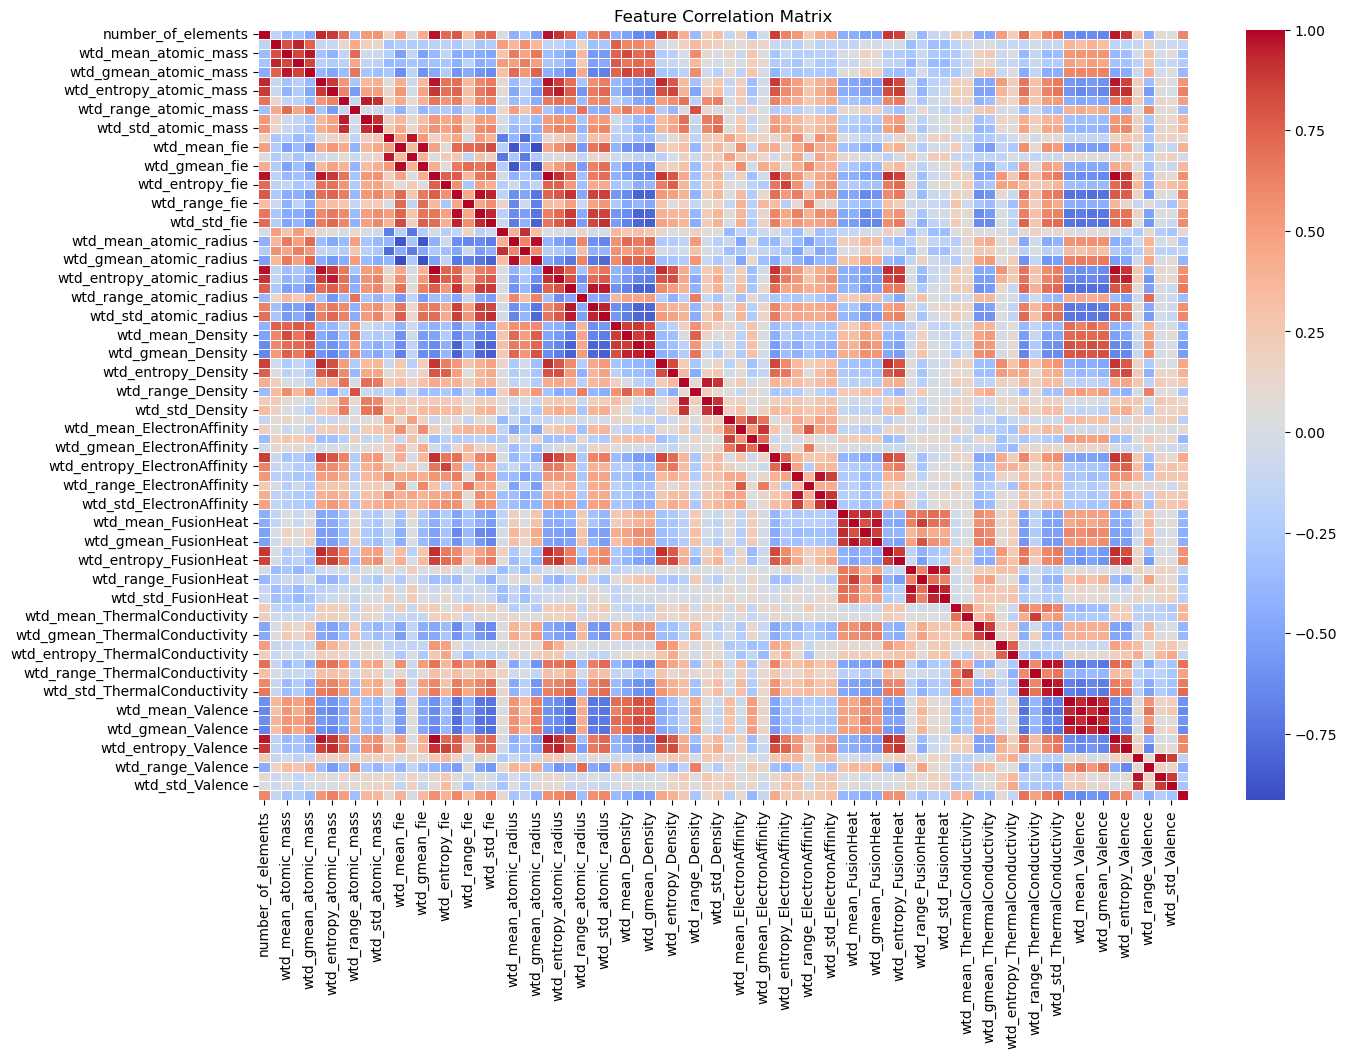

critical_temp                  1.000000
wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
                                 ...   
gmean_Density                 -0.541684
gmean_Valence                 -0.573068
mean_Valence                  -0.600085
wtd_gmean_Valence             -0.615653
wtd_mean_Valence              -0.632401
Name: critical_temp, Length: 82, dtype: float64

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.savefig("Correlation_pre",bbox_inches='tight', dpi=300)
plt.show()

# Display the correlations of features with the target variable
target_correlation = correlation_matrix['critical_temp'].sort_values(ascending=False)
target_correlation

Yes we observe very red and very blue colored cells indicating the existance of multicollinearity. In the code below I fet rid of one of the pairs, after excluding the self-correlation from the array. I put the threshold 0.9 with rough reference.

In [219]:
# Step 1: Iteratively drop highly correlated and anti-correlated features
threshold = 0.9  # Define the threshold for strong correlations

while True:
    correlation_matrix = data.corr()
    # Find the pair with the highest absolute correlation above the threshold
    max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
    max_corr = max_corr[max_corr < 1.0]  # Exclude self-correlations

    if max_corr.iloc[0] < threshold:
        break  # Exit loop if no correlations above the threshold

    # Get the first pair with high correlation
    feature1, feature2 = max_corr.index[0]

    # Drop one of the correlated features (arbitrarily drop feature2)
    print(f"Dropping feature: {feature2} (correlated with {feature1}, correlation={correlation_matrix[feature1][feature2]:.2f})")
    data = data.drop(columns=[feature2])


Dropping feature: entropy_fie (correlated with entropy_atomic_radius, correlation=1.00)
Dropping feature: wtd_mean_Valence (correlated with wtd_gmean_Valence, correlation=0.99)
Dropping feature: wtd_gmean_fie (correlated with wtd_mean_fie, correlation=0.99)
Dropping feature: gmean_Valence (correlated with mean_Valence, correlation=0.99)
Dropping feature: entropy_atomic_radius (correlated with entropy_Valence, correlation=0.99)
Dropping feature: std_ThermalConductivity (correlated with range_ThermalConductivity, correlation=0.99)
Dropping feature: range_FusionHeat (correlated with std_FusionHeat, correlation=0.98)
Dropping feature: range_fie (correlated with std_fie, correlation=0.98)
Dropping feature: wtd_mean_atomic_radius (correlated with wtd_gmean_atomic_radius, correlation=0.98)
Dropping feature: range_Valence (correlated with std_Valence, correlation=0.97)
Dropping feature: range_ElectronAffinity (correlated with std_ElectronAffinity, correlation=0.97)
Dropping feature: wtd_mean_F

Now, our features dropped from 82 to 47. This will not only make the model better but also decrease the computational cost.

In [198]:
display(data)
data_n = data #for non-linears

,number_of_elements,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,mean_fie,wtd_entropy_fie,wtd_range_fie,std_fie,mean_atomic_radius,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,57.862692,66.361592,31.794921,51.968828,775.425000,0.791488,735.985714,323.811808,160.250000,...,0.621979,0.308148,0.262848,399.97342,57.127669,2.25,1.085714,0.433013,0.437059,29.00
1,5,58.518416,73.132787,36.161939,47.094633,766.440000,0.807078,743.164286,290.183029,161.200000,...,0.619735,0.847404,0.567706,429.97342,51.413383,2.00,1.128571,0.632456,0.468606,26.00
2,4,57.885242,66.361592,35.741099,51.968828,775.425000,0.773620,743.164286,323.811808,160.250000,...,0.619095,0.308148,0.250477,399.97342,57.127669,2.25,1.114286,0.433013,0.444697,19.00
3,4,57.873967,66.361592,33.768010,51.968828,775.425000,0.783207,739.575000,323.811808,160.250000,...,0.620535,0.308148,0.257045,399.97342,57.127669,2.25,1.100000,0.433013,0.440952,22.00
4,4,57.840143,66.361592,27.848743,51.968828,775.425000,0.805230,728.807143,323.811808,160.250000,...,0.624878,0.308148,0.272820,399.97342,57.127669,2.25,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,53.095769,82.515384,15.504479,65.764081,661.775000,0.927050,427.546667,114.383355,176.500000,...,95.001493,1.029002,0.634332,134.00000,83.048889,3.25,2.168889,0.433013,0.496904,2.44
21259,5,49.021367,64.812662,7.353333,69.232655,747.780000,0.988470,659.771429,293.286136,159.200000,...,1.577047,0.949904,0.745515,399.97342,76.176553,2.20,0.904762,0.400000,0.212959,122.10
21260,2,95.609104,99.433882,53.041104,6.756810,733.550000,0.542120,370.180000,69.950000,183.500000,...,57.038314,0.683870,0.559446,17.00000,29.000000,4.50,3.200000,0.500000,0.400000,1.98
21261,2,97.095602,99.433882,31.115202,6.756810,733.550000,0.648876,208.799000,69.950000,183.500000,...,58.781651,0.683870,0.659671,17.00000,15.250000,4.50,2.210000,0.500000,0.462493,1.84


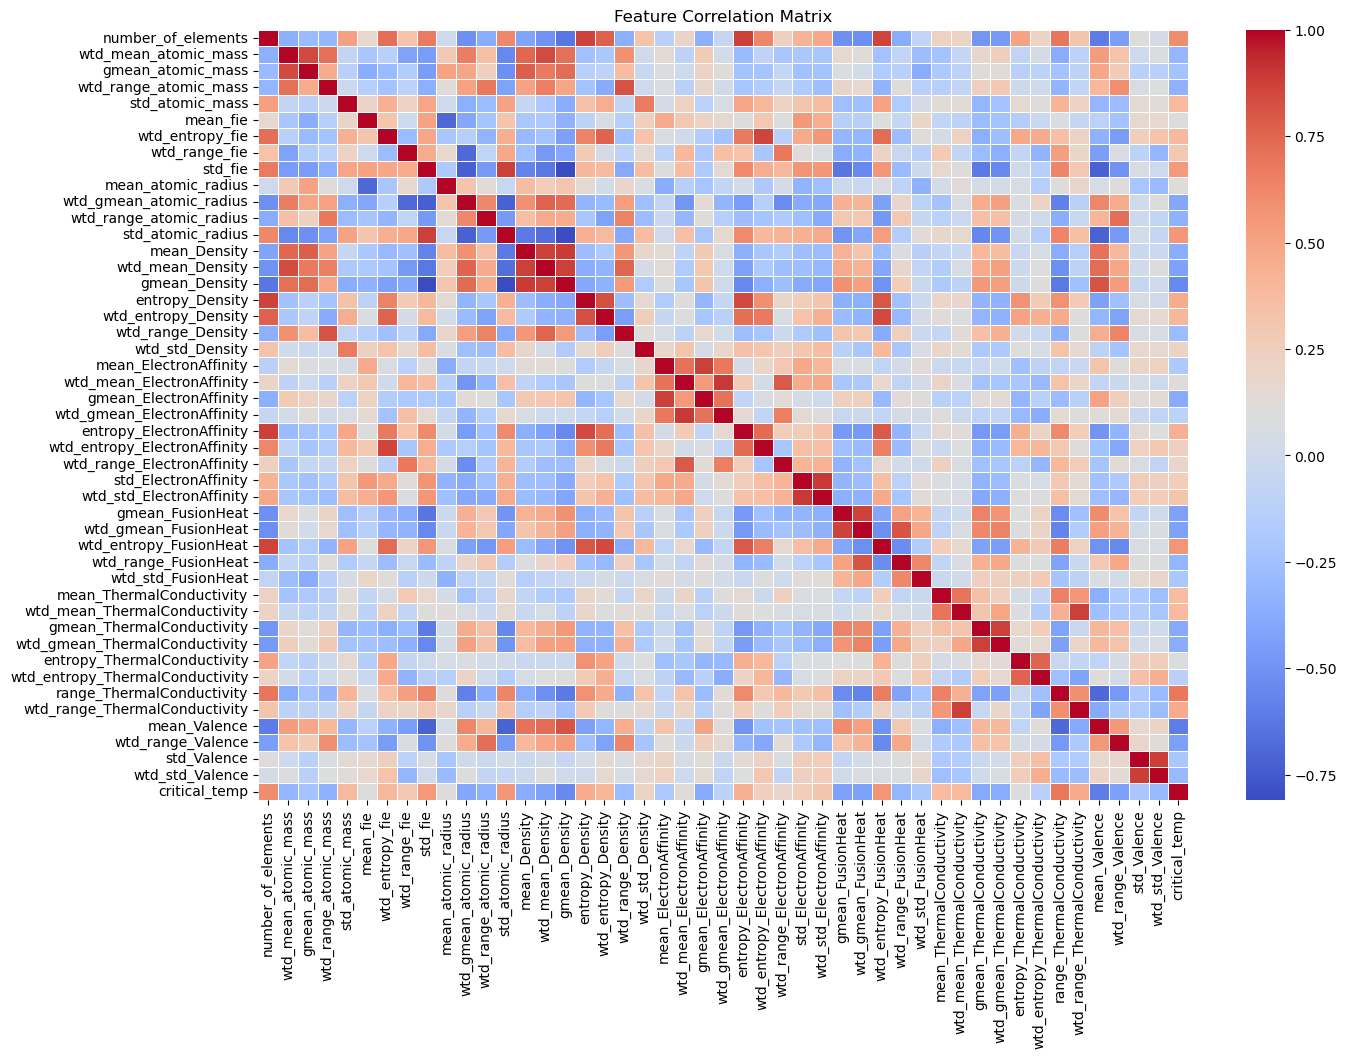

critical_temp                      1.000000
range_ThermalConductivity          0.687654
number_of_elements                 0.601069
wtd_entropy_FusionHeat             0.563244
std_atomic_radius                  0.559629
std_fie                            0.541804
wtd_range_ThermalConductivity      0.469572
entropy_Density                    0.457169
entropy_ElectronAffinity           0.437207
wtd_entropy_Density                0.400190
wtd_entropy_fie                    0.388359
wtd_mean_ThermalConductivity       0.379336
std_atomic_mass                    0.378766
mean_ThermalConductivity           0.375813
wtd_std_ElectronAffinity           0.315147
wtd_range_fie                      0.300482
std_ElectronAffinity               0.262103
wtd_entropy_ElectronAffinity       0.237648
wtd_std_Density                    0.207663
wtd_range_ElectronAffinity         0.185348
wtd_mean_ElectronAffinity          0.111516
mean_atomic_radius                 0.105273
mean_fie                        

In [200]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.savefig("Correlation_post",bbox_inches='tight', dpi=300)
plt.show()

# Display the correlations of features with the target variable
target_correlation = correlation_matrix['critical_temp'].sort_values(ascending=False)
target_correlation

As you can see above, we do not have correlated pairs with more than 0.9. Note that I also excluded very anticorrelated pairs. That is why I put absolute function in the above code.

## Feature Engineering: Forward Feature Selection with Ridge and Lasso methods

It is important to further cut down the features since 47 is still huge number. It is likely like that critical temperature is going to depend on smaller number of features. In other words, there are less number of feature actually affecting critical temperature function. That is why I use Sequential Feature Selector with Ridge and Lasso models. Each is going to be used in the regressor with corresponding name.

Ridge selected features:
Index(['std_atomic_mass', 'wtd_entropy_fie', 'wtd_range_fie',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity',
       'wtd_entropy_FusionHeat', 'wtd_std_FusionHeat',
       'wtd_mean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity',
       'wtd_range_ThermalConductivity', 'wtd_range_Valence',
       'wtd_std_Valence'],
      dtype='object')
Lasso selected features:
Index(['number_of_elements', 'wtd_range_atomic_mass', 'std_atomic_mass',
       'mean_fie', 'wtd_gmean_atomic_radius', 'wtd_range_atomic_radius',
       'std_atomic_radius', 'mean_Density', 'wtd_mean_Density',
       'wtd_gmean_ElectronAffinity', 'wtd_en

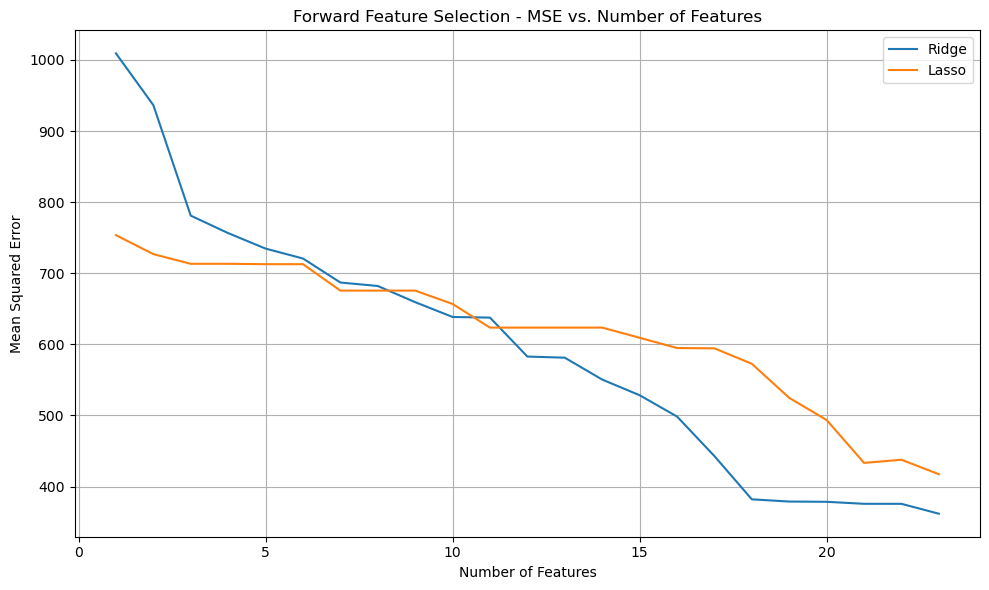

In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = data.drop(columns=["critical_temp"])
y = data["critical_temp"]

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Perform forward feature selection and track MSE for each subset of features
selected_features = {}
mse_scores = {'Ridge': [], 'Lasso': []}

#Identify sfs for each model
sfs_array = []

for model_name, model in {"Ridge": Ridge(), "Lasso": Lasso()}.items():
    sfs = SequentialFeatureSelector(
        model,
        direction="forward",
        scoring="neg_mean_squared_error",  # Use negative MSE for the scoring parameter
        cv=5
    )
    sfs.fit(X_train, y_train)

    sfs_array.append(sfs)
    
    # Get the mask of selected features
    mask = sfs.get_support()
    selected_features[model_name] = X.columns[mask]

    print(f"{model_name} selected features:")
    print(selected_features[model_name])

    # Track MSE for each number of selected features
    for k in range(1, sum(mask) + 1):  # We iterate up to the number of selected features
        # Select the first k features based on the mask
        selected_X = X_train[:, mask]  # Select only the features that are marked True in the mask
        selected_X = selected_X[:, :k]  # Only keep the first k features
        mse = -cross_val_score(model, selected_X, y_train, cv=5, scoring="neg_mean_squared_error").mean()
        mse_scores[model_name].append(mse)

# Step 5: Plot the MSE for each model as a function of the number of selected features
plt.figure(figsize=(10, 6))
for model_name in mse_scores:
    plt.plot(range(1, len(mse_scores[model_name]) + 1), mse_scores[model_name], label=model_name)
plt.xlabel("Number of Features")
plt.ylabel("Mean Squared Error")
plt.title("Forward Feature Selection - MSE vs. Number of Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Forward_feature_selection")
plt.show()

Number of features dropped to 23 from 47.

## Machine Learning Model -- Ridge and Lasso Regression without FFS

Firstly, let us see what happens what happens by adding entire feature sets (47 features)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.727e+06, tolerance: 1.598e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.811e+06, tolerance: 1.612e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.705e+06, toler

Model Comparison:

   Model  Best Alpha      CV MSE    Test MSE  Test R^2
0  Ridge    0.828643  354.911310  340.461172  0.704225
1  Lasso    0.004292  354.861674  340.367663  0.704306


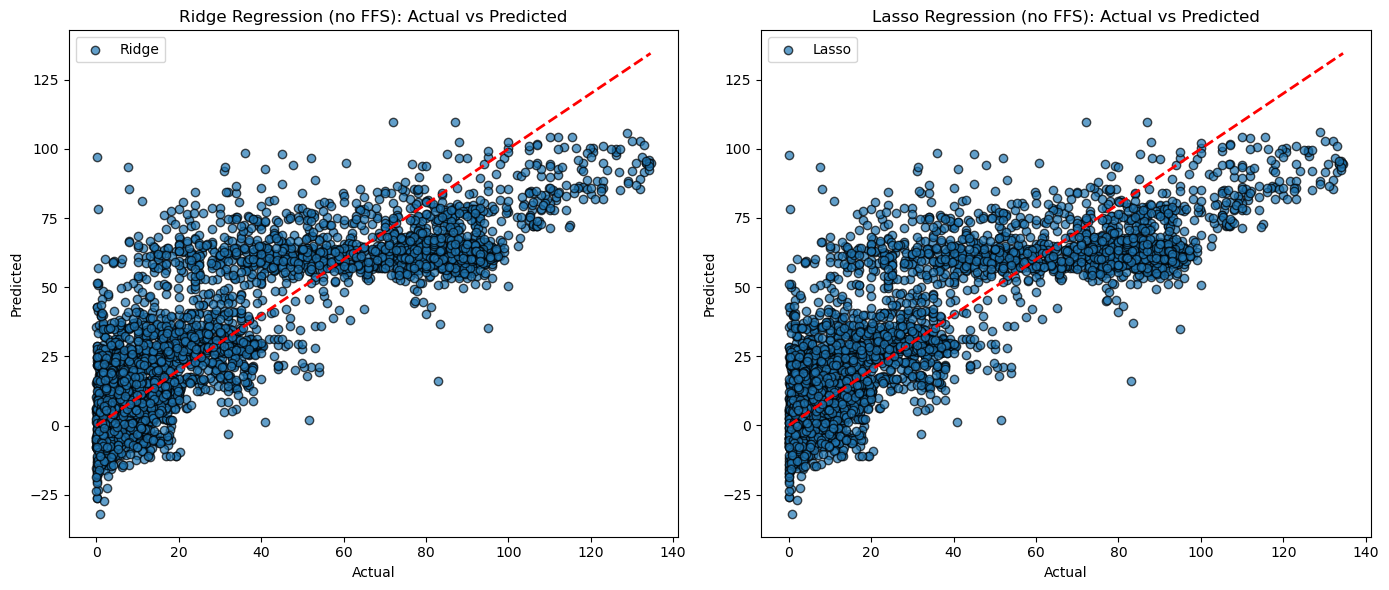


Analysis Summary:
Ridge Model: Best Alpha = 0.8286, Test MSE = 340.4612, Test R^2 = 0.7042
Lasso Model: Best Alpha = 0.0043, Test MSE = 340.3677, Test R^2 = 0.7043


In [163]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features for Ridge and Lasso separately
X_train_ridge = X_train 
X_test_ridge = X_test
X_train_lasso = X_train  
X_test_lasso = X_test

# Step 1: Hyperparameter tuning with GridSearchCV
def tune_model(model, X_train_selected, param_grid):
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_selected, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, -grid_search.best_score_

# Ridge tuning
ridge_params = {'alpha': np.logspace(-4, 4, 50)}
ridge_model, ridge_best_params, ridge_best_mse = tune_model(Ridge(), X_train_ridge, ridge_params)

# Lasso tuning
lasso_params = {'alpha': np.logspace(-4, 4, 50)}
lasso_model, lasso_best_params, lasso_best_mse = tune_model(Lasso(), X_train_lasso, lasso_params)

# Step 2: Evaluate on the test set
def evaluate_model(model, X_test_selected, y_test):
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

ridge_test_mse, ridge_test_r2, ridge_y_pred = evaluate_model(ridge_model, X_test_ridge, y_test)
lasso_test_mse, lasso_test_r2, lasso_y_pred = evaluate_model(lasso_model, X_test_lasso, y_test)

# Step 3: Analyze results
results = {
    "Model": ["Ridge", "Lasso"],
    "Best Alpha": [ridge_best_params['alpha'], lasso_best_params['alpha']],
    "CV MSE": [ridge_best_mse, lasso_best_mse],
    "Test MSE": [ridge_test_mse, lasso_test_mse],
    "Test R^2": [ridge_test_r2, lasso_test_r2]
}
results_df = pd.DataFrame(results)

print("Model Comparison:\n")
print(results_df)

# Step 4: Visualize actual vs. predicted
plt.figure(figsize=(14, 6))

# Ridge plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_y_pred, alpha=0.7, edgecolor='k', label="Ridge")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Ridge Regression (no FFS): Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# Lasso plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_y_pred, alpha=0.7, edgecolor='k', label="Lasso")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Lasso Regression (no FFS): Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

plt.tight_layout()
plt.savefig("Ridge_Lasso_method_no_FFS")
plt.show()

# Analysis Summary
print("\nAnalysis Summary:")
print("Ridge Model: Best Alpha = {:.4f}, Test MSE = {:.4f}, Test R^2 = {:.4f}".format(
    ridge_best_params['alpha'], ridge_test_mse, ridge_test_r2))
print("Lasso Model: Best Alpha = {:.4f}, Test MSE = {:.4f}, Test R^2 = {:.4f}".format(
    lasso_best_params['alpha'], lasso_test_mse, lasso_test_r2))


Although the results are obtained, the calculations encountered convergence problem

## Machine Learning Model -- Ridge and Lasso Regression with FFS

Model Comparison:

   Model  Best Alpha      CV MSE    Test MSE  Test R^2
0  Ridge    0.184207  361.790924  347.952714  0.697716
1  Lasso    0.000954  384.447049  367.376579  0.680842


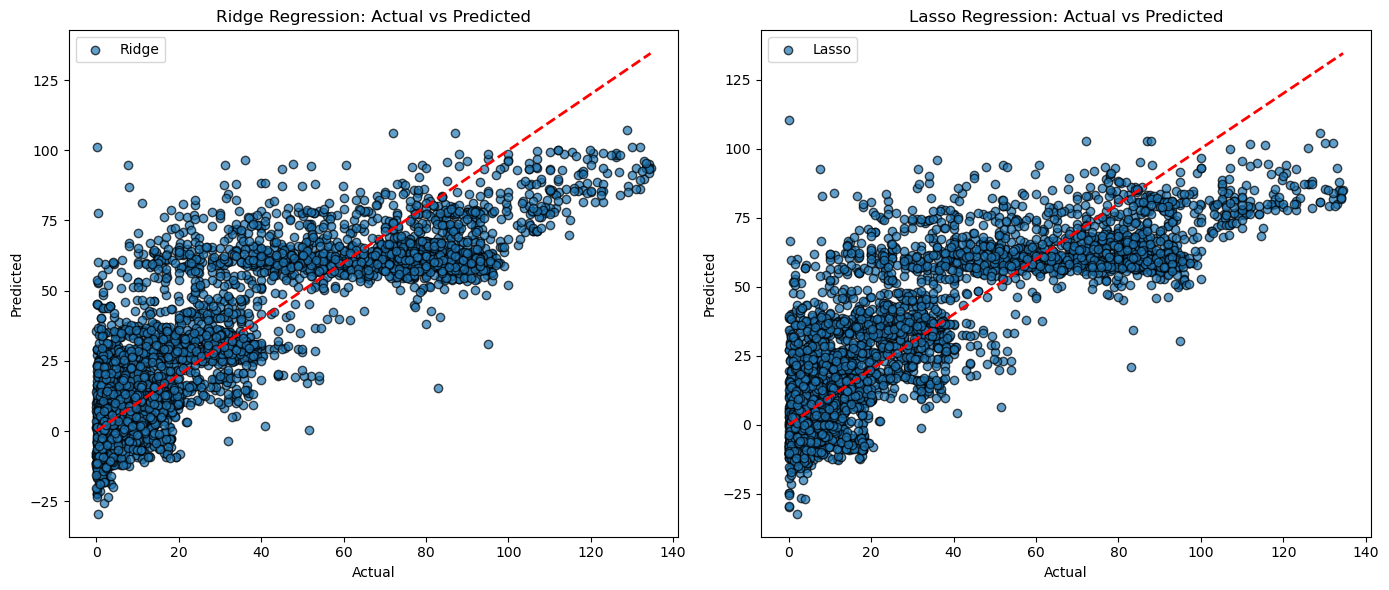


Analysis Summary:
Ridge Model: Best Alpha = 0.1842, Test MSE = 347.9527, Test R^2 = 0.6977
Lasso Model: Best Alpha = 0.0010, Test MSE = 367.3766, Test R^2 = 0.6808


In [92]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features for Ridge and Lasso separately
X_train_ridge = X_train[:, sfs_array[0].get_support()]  # Select the features chosen by forward selection
X_test_ridge = X_test[:, sfs_array[0].get_support()]
X_train_lasso = X_train[:, sfs_array[1].get_support()]  # Select the features chosen by forward selection
X_test_lasso = X_test[:, sfs_array[1].get_support()]

# Step 1: Hyperparameter tuning with GridSearchCV
def tune_model(model, X_train_selected, param_grid):
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_selected, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, -grid_search.best_score_

# Ridge tuning
ridge_params = {'alpha': np.logspace(-4, 4, 50)}
ridge_model, ridge_best_params, ridge_best_mse = tune_model(Ridge(), X_train_ridge, ridge_params)

# Lasso tuning
lasso_params = {'alpha': np.logspace(-4, 4, 50)}
lasso_model, lasso_best_params, lasso_best_mse = tune_model(Lasso(), X_train_lasso, lasso_params)

# Step 2: Evaluate on the test set
def evaluate_model(model, X_test_selected, y_test):
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

ridge_test_mse, ridge_test_r2, ridge_y_pred = evaluate_model(ridge_model, X_test_ridge, y_test)
lasso_test_mse, lasso_test_r2, lasso_y_pred = evaluate_model(lasso_model, X_test_lasso, y_test)

# Step 3: Analyze results
results = {
    "Model": ["Ridge", "Lasso"],
    "Best Alpha": [ridge_best_params['alpha'], lasso_best_params['alpha']],
    "CV MSE": [ridge_best_mse, lasso_best_mse],
    "Test MSE": [ridge_test_mse, lasso_test_mse],
    "Test R^2": [ridge_test_r2, lasso_test_r2]
}
results_df = pd.DataFrame(results)

print("Model Comparison:\n")
print(results_df)

# Step 4: Visualize actual vs. predicted
plt.figure(figsize=(14, 6))

# Ridge plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_y_pred, alpha=0.7, edgecolor='k', label="Ridge")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# Lasso plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_y_pred, alpha=0.7, edgecolor='k', label="Lasso")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

plt.tight_layout()
plt.savefig("Ridge_Lasso_method")
plt.show()

# Analysis Summary
print("\nAnalysis Summary:")
print("Ridge Model: Best Alpha = {:.4f}, Test MSE = {:.4f}, Test R^2 = {:.4f}".format(
    ridge_best_params['alpha'], ridge_test_mse, ridge_test_r2))
print("Lasso Model: Best Alpha = {:.4f}, Test MSE = {:.4f}, Test R^2 = {:.4f}".format(
    lasso_best_params['alpha'], lasso_test_mse, lasso_test_r2))


Without any convergence problem and without any loss in accuracy, the the results are obtained with features chosen by feature selector

## Kernel Ridge regression using FFS features

As we proved the advantage of FFS, we can just it to develop Kernel Ridge Regression. I use Ridge model features.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/lin

Model Comparison:

                    Model  Best Alpha      CV MSE    Test MSE  Test R^2
0  Kernel Ridge (General)    0.046416  134.409792  107.746376  0.906395


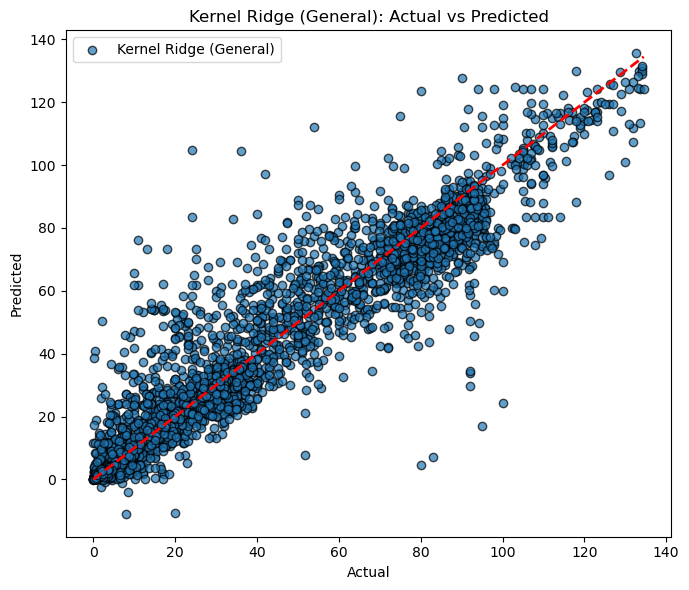


Analysis Summary:
Kernel Ridge (General): Best Alpha = 0.0464, Best Gamma = 0.3981, Test MSE = 107.7464, Test R^2 = 0.9064


In [110]:
# Step 1: Hyperparameter tuning with RandomizedSearchCV
def tune_model(model, X_train_selected, param_distributions, n_iter=50):
    random_search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, scoring='neg_mean_squared_error', cv=5, random_state=42)
    random_search.fit(X_train_selected, y_train)
    return random_search.best_estimator_, random_search.best_params_, -random_search.best_score_

# Kernel Ridge tuning with RBF kernel
kridge_params = {
    'alpha': np.logspace(-4, 4, 10),
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': np.logspace(-4, 2, 6)
}
kridge_model, kridge_best_params, kridge_best_mse = tune_model(KernelRidge(), X_train_ridge, kridge_params)

# Step 2: Evaluate on the test set
def evaluate_model(model, X_test_selected, y_test):
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

kridge_test_mse, kridge_test_r2, kridge_y_pred = evaluate_model(kridge_model, X_test_ridge, y_test)


Model Comparison:

                              Model  Best Alpha      CV MSE    Test MSE  \
0  Kernel Ridge (Ridge like params)    0.046416  134.409792  107.746376   

   Test R^2  
0  0.906395  


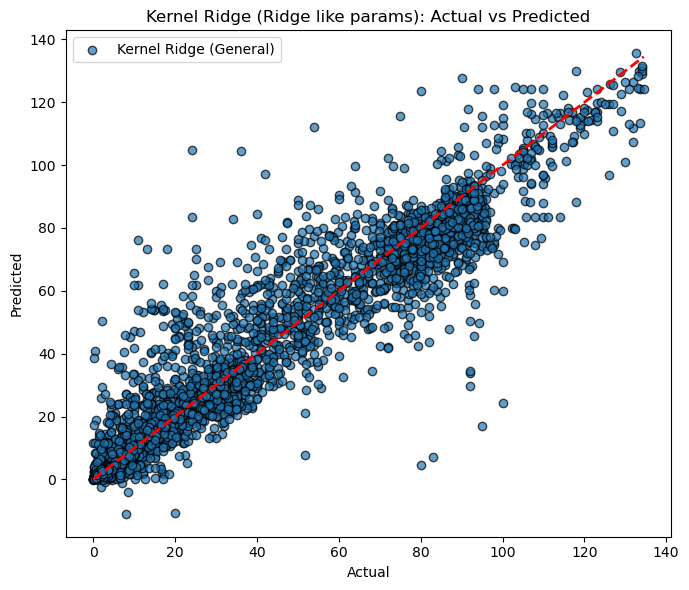


Analysis Summary:
Kernel Ridge (Ridge like params): Best Alpha = 0.0464, Best Gamma = 0.3981, Test MSE = 107.7464, Test R^2 = 0.9064


In [140]:
# Step 3: Analyze results
results = {
    "Model": ["Kernel Ridge (Ridge like params)"],
    "Best Alpha": [kridge_best_params['alpha']],
    "CV MSE": [kridge_best_mse],
    "Test MSE": [kridge_test_mse],
    "Test R^2": [kridge_test_r2]
}
results_df = pd.DataFrame(results)

print("Model Comparison:\n")
print(results_df)

# Step 4: Visualize actual vs. predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, kridge_y_pred, alpha=0.7, edgecolor='k', label="Kernel Ridge (General)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Kernel Ridge (Ridge like params): Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.tight_layout()
plt.savefig("Kernel_method_ridge")
plt.show()

# Analysis Summary
print("\nAnalysis Summary:")
print("Kernel Ridge (Ridge like params): Best Alpha = {:.4f}, Best Gamma = {:.4f}, Test MSE = {:.4f}, Test R^2 = {:.4f}".format(
    kridge_best_params['alpha'], kridge_best_params.get('gamma', np.nan), kridge_test_mse, kridge_test_r2))

I used the features obtained from FFS with Ridge model in Kernel_Ridge Regression. The model performed better than the previous linear models. This is expected since Kernel_Ridge function applies additional dependencies on the weight of the effect of each data points. The bar graph below summarizes this observation.

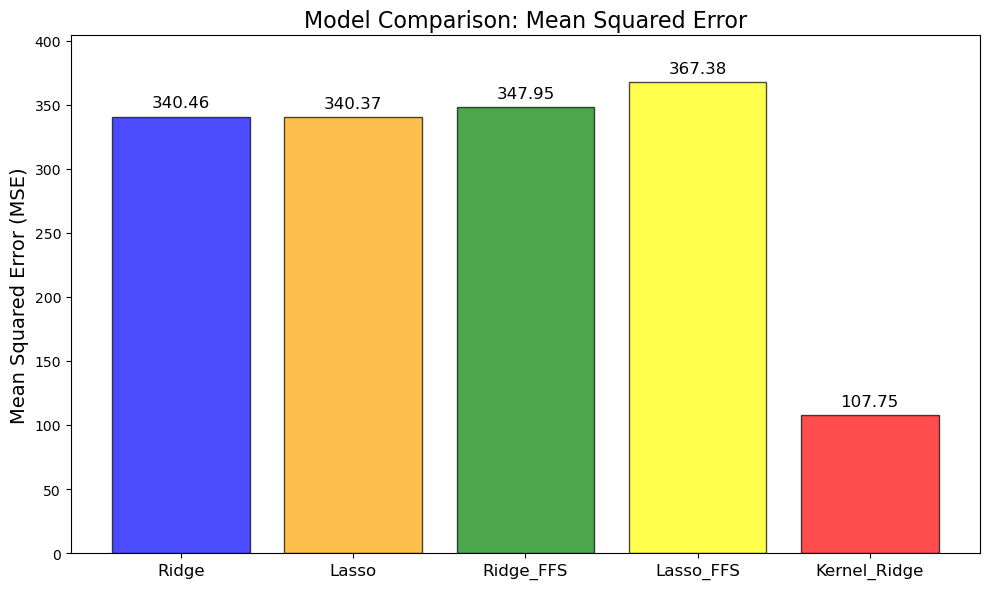

In [225]:
import matplotlib.pyplot as plt
import numpy as np

# Example MSE values for different models
models = ["Ridge", "Lasso", "Ridge_FFS","Lasso_FFS","Kernel_Ridge"]
mse_values = [340.46, 340.37, 347.95,367.38,107.746]  # Replace these variables with your computed MSE values

# Create the bar graph
plt.figure(figsize=(10, 6))
bar_positions = np.arange(len(models))
plt.bar(bar_positions, mse_values, color=['blue', 'orange', 'green',"yellow","red"], alpha=0.7, edgecolor='black')

# Add labels and title
plt.xticks(bar_positions, models, fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)
plt.title("Model Comparison: Mean Squared Error", fontsize=16)
plt.ylim(0, max(mse_values) * 1.1)  # Adjust y-axis to have some margin
for i, mse in enumerate(mse_values):
    plt.text(i, mse + 0.02 * max(mse_values), f"{mse:.2f}", ha='center', fontsize=12)

# Show and save the plot
plt.tight_layout()
plt.savefig("Model_MSE_Comparison_linear.png")
plt.show()


## Feature Engineering: Forward Feature Selection with Gradient Boosting method (for non-linear models)

For Non-linear models, Ridge and Lasso like models cannot be considered efficient as they don't capture the non-linear nature of dataset. It is recommended to use either RF or Gradient Boosting model in Sequential Feature Selector. I use GB as it is less computationally expensive.

Gradient Boosting selected features:
Index(['number_of_elements', 'std_atomic_mass', 'mean_fie', 'wtd_entropy_fie',
       'std_atomic_radius', 'mean_Density', 'gmean_Density', 'entropy_Density',
       'wtd_entropy_Density', 'wtd_range_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'gmean_ElectronAffinity',
       'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity',
       'wtd_range_ElectronAffinity', 'std_ElectronAffinity',
       'wtd_mean_ThermalConductivity', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity',
       'std_Valence', 'wtd_std_Valence'],
      dtype='object')


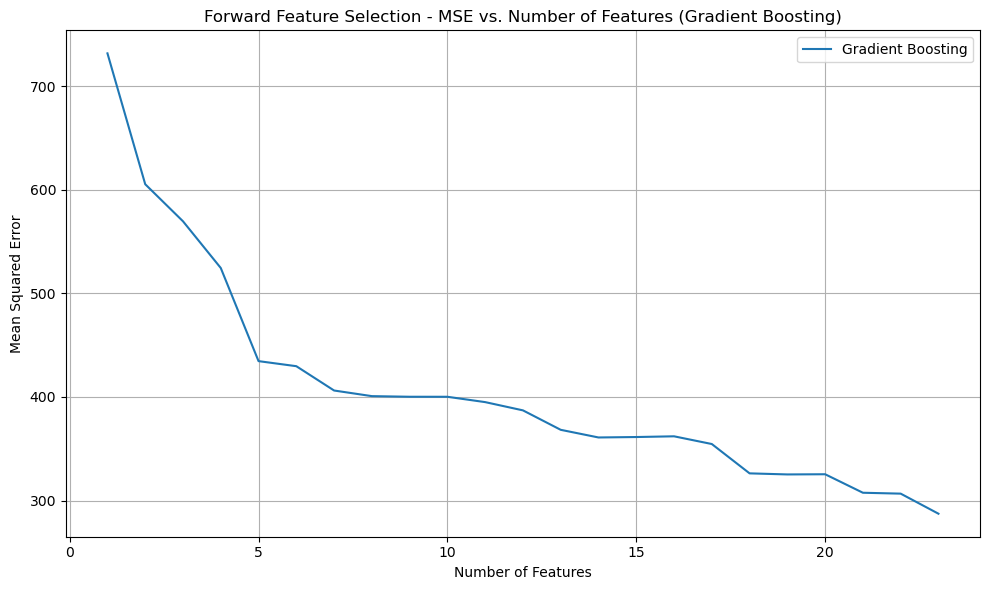

In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = data_n.drop(columns=["critical_temp"])
y = data_n["critical_temp"]

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Perform forward feature selection using GradientBoostingRegressor
selected_features = {}
mse_scores = []

# Initialize Gradient Boosting model (fewer estimators for efficiency)
gb_model = GradientBoostingRegressor(n_estimators=20, max_depth=3, random_state=42)

sfs = SequentialFeatureSelector(
    gb_model,
    direction="forward",
    scoring="neg_mean_squared_error",  # Use negative MSE for the scoring parameter
    cv=5,
    n_jobs=8  # Use 8 cores for parallelism
)
sfs.fit(X_train, y_train)

# Get the mask of selected features
mask = sfs.get_support()
selected_features_gb = X.columns[mask]

print("Gradient Boosting selected features:")
print(selected_features_gb)

# Track MSE for each number of selected features
for k in range(1, sum(mask) + 1):  # We iterate up to the number of selected features
    # Select the first k features based on the mask
    selected_X = X_train[:, mask]  # Select only the features that are marked True in the mask
    selected_X = selected_X[:, :k]  # Only keep the first k features
    mse = -cross_val_score(gb_model, selected_X, y_train, cv=5, scoring="neg_mean_squared_error").mean()
    mse_scores.append(mse)

# Step 5: Plot the MSE as a function of the number of selected features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_scores) + 1), mse_scores, label="Gradient Boosting")
plt.xlabel("Number of Features")
plt.ylabel("Mean Squared Error")
plt.title("Forward Feature Selection - MSE vs. Number of Features (Gradient Boosting)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Forward_feature_selection_gb")
plt.show()


Interestingly, we get the same number of features (23). However, different features are obtained in this analysis.

## Machine Learning Model -- Random Forest

Model Comparison:

           Model                                    Best Parameters  \
0  Random Forest  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...   

       CV MSE   Test MSE  Test R^2  
0  104.310793  85.278264  0.925915  


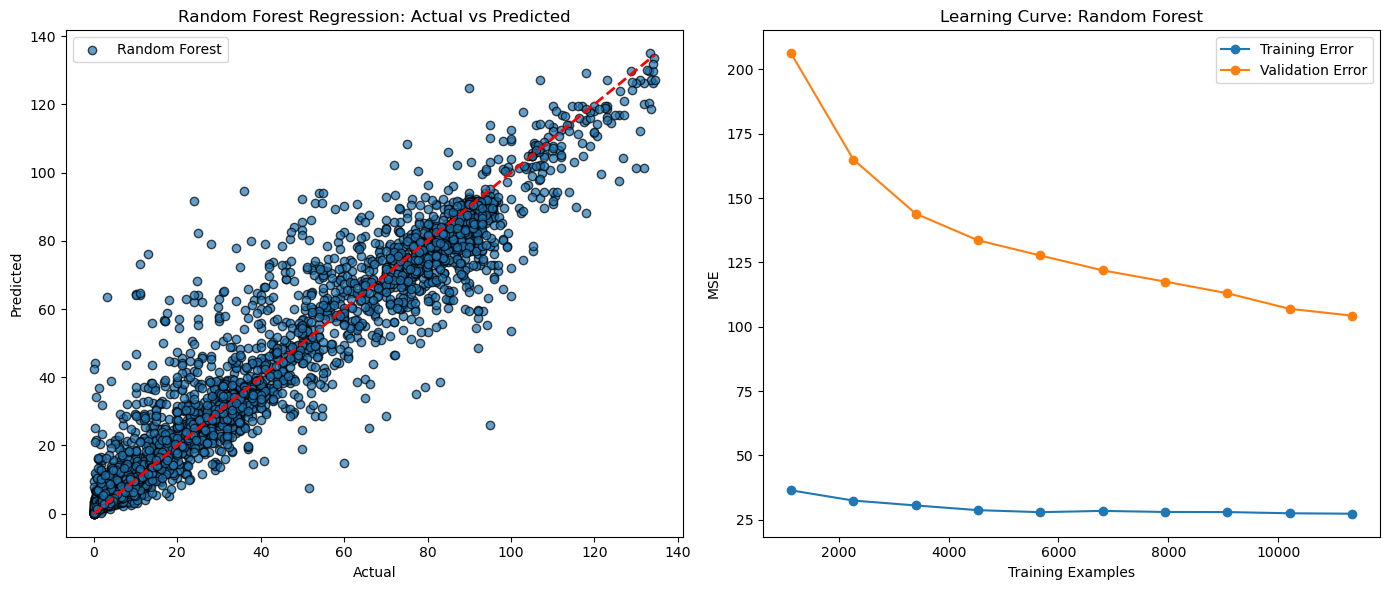


Analysis Summary:
Random Forest Model: Best Parameters = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}, Test MSE = 85.2783, Test R^2 = 0.9259


In [204]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_train = X_train[:, sfs.get_support()]  # Select the features chosen by forward selection
X_test = X_test[:, sfs.get_support()]

# Step 1: Hyperparameter tuning with GridSearchCV
def tune_model(model, X_train, param_grid):
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, -grid_search.best_score_

# Random Forest tuning
rf_params = {
    'n_estimators': [50, 100, 150],  # Lower number of estimators for reduced runtime
    'max_depth': [None, 10, 20],  # Test fewer depth levels
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model, rf_best_params, rf_best_mse = tune_model(RandomForestRegressor(random_state=42), X_train, rf_params)

# Step 2: Evaluate on the test set
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

rf_test_mse, rf_test_r2, rf_y_pred = evaluate_model(rf_model, X_test, y_test)

# Step 3: Analyze results
results = {
    "Model": ["Random Forest"],
    "Best Parameters": [rf_best_params],
    "CV MSE": [rf_best_mse],
    "Test MSE": [rf_test_mse],
    "Test R^2": [rf_test_r2]
}
results_df = pd.DataFrame(results)

print("Model Comparison:\n")
print(results_df)

# Step 4: Visualize actual vs. predicted
plt.figure(figsize=(14, 6))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_y_pred, alpha=0.7, edgecolor='k', label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Random Forest Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# Step 5: Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(**rf_best_params, random_state=42),
    X_train, y_train, cv=3, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Error")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation Error")
plt.title("Learning Curve: Random Forest")
plt.xlabel("Training Examples")
plt.ylabel("MSE")
plt.legend()

plt.tight_layout()
plt.savefig("RandomForest_LearningCurve.png")
plt.show()

# Analysis Summary
print("\nAnalysis Summary:")
print("Random Forest Model: Best Parameters = {}, Test MSE = {:.4f}, Test R^2 = {:.4f}".format(
    rf_best_params, rf_test_mse, rf_test_r2))


As you can see the model is predicted with higher accuracy than above models. However, there are still outliers not being predicted
accurately. In the learning curve we see very huge gap between training and cross validation error. I think this is because of 
overfitting.

## Machine Learning Model -- Support Vector Regression

Model Comparison:

  Model                                    Best Parameters      CV MSE  \
0   SVR  {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'k...  229.968485   

     Test MSE  Test R^2  
0  208.122885  0.819193  


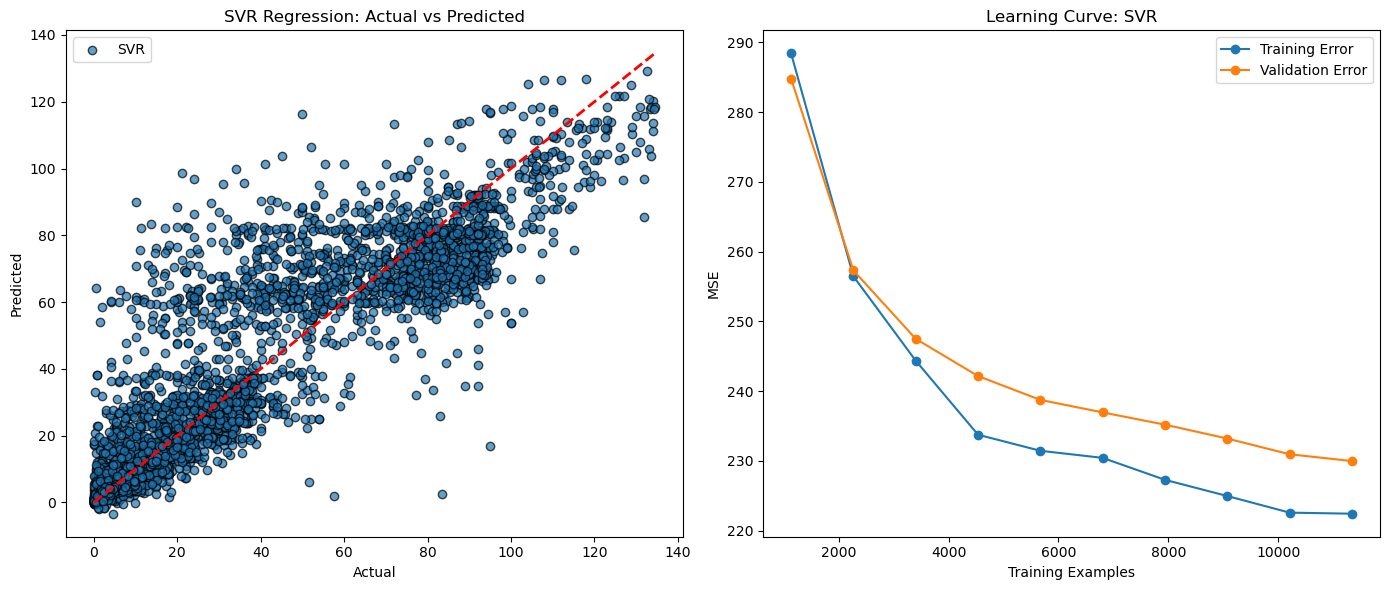


Analysis Summary:
SVR Model: Best Parameters = {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}, Test MSE = 208.1229, Test R^2 = 0.8192


In [206]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Hyperparameter tuning with GridSearchCV
def tune_model(model, X_train, param_grid):
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, -grid_search.best_score_

# SVR tuning
svr_params = {
    'kernel': ['linear', 'poly', 'rbf'],  # Test different kernels
    'C': [0.1, 1, 10],                   # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5],          # Epsilon in the epsilon-SVR model
    'gamma': ['scale', 'auto']           # Kernel coefficient
}

svr_model, svr_best_params, svr_best_mse = tune_model(SVR(), X_train, svr_params)

# Step 2: Evaluate on the test set
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

svr_test_mse, svr_test_r2, svr_y_pred = evaluate_model(svr_model, X_test, y_test)

# Step 3: Analyze results
results = {
    "Model": ["SVR"],
    "Best Parameters": [svr_best_params],
    "CV MSE": [svr_best_mse],
    "Test MSE": [svr_test_mse],
    "Test R^2": [svr_test_r2]
}
results_df = pd.DataFrame(results)

print("Model Comparison:\n")
print(results_df)

# Step 4: Visualize actual vs. predicted
plt.figure(figsize=(14, 6))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, svr_y_pred, alpha=0.7, edgecolor='k', label="SVR")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("SVR Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# Step 5: Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    SVR(**svr_best_params),
    X_train, y_train, cv=3, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Error")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation Error")
plt.title("Learning Curve: SVR")
plt.xlabel("Training Examples")
plt.ylabel("MSE")
plt.legend()

plt.tight_layout()
plt.savefig("SVR_LearningCurve.png")
plt.show()

# Analysis Summary
print("\nAnalysis Summary:")
print("SVR Model: Best Parameters = {}, Test MSE = {:.4f}, Test R^2 = {:.4f}".format(
    svr_best_params, svr_test_mse, svr_test_r2))


SVR model predicts better than the linear models but doesn't work as accurate as linear, Kernel Ridge, and RF models. However, validation
and training errors do not have very big difference. This means that training may not capture the noises in the data. That also leads to
underfitting. That is why we see a lot of dispersion in the mid temperatures.

## Machine Learning Model -- Neural Network

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_

Model Comparison:

            Model                                    Best Parameters  \
0  Neural Network  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...   

       CV MSE   Test MSE  Test R^2  
0  129.512672  112.59545  0.902183  


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_

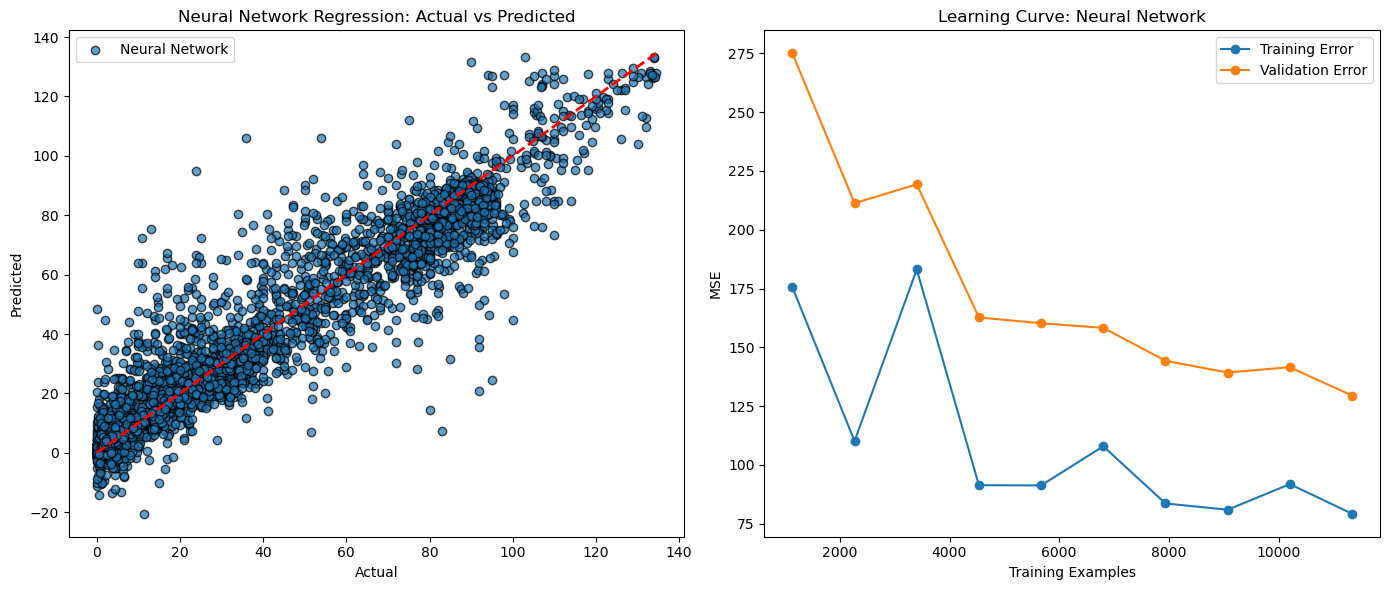


Analysis Summary:
Neural Network Model: Best Parameters = {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}, Test MSE = 112.5955, Test R^2 = 0.9022


In [208]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Hyperparameter tuning with GridSearchCV
def tune_model(model, X_train, param_grid):
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, -grid_search.best_score_

# Neural Network tuning
nn_params = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],  # Vary the number of neurons and layers
    'activation': ['relu', 'tanh'],                  # Activation functions
    'solver': ['adam'],                              # Optimizer (e.g., 'adam', 'sgd')
    'alpha': [0.0001, 0.001, 0.01],                  # Regularization term
    'learning_rate': ['constant', 'adaptive']        # Learning rate schedule
}

nn_model, nn_best_params, nn_best_mse = tune_model(MLPRegressor(random_state=42, max_iter=500), X_train, nn_params)

# Step 2: Evaluate on the test set
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

nn_test_mse, nn_test_r2, nn_y_pred = evaluate_model(nn_model, X_test, y_test)

# Step 3: Analyze results
results = {
    "Model": ["Neural Network"],
    "Best Parameters": [nn_best_params],
    "CV MSE": [nn_best_mse],
    "Test MSE": [nn_test_mse],
    "Test R^2": [nn_test_r2]
}
results_df = pd.DataFrame(results)

print("Model Comparison:\n")
print(results_df)

# Step 4: Visualize actual vs. predicted
plt.figure(figsize=(14, 6))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, nn_y_pred, alpha=0.7, edgecolor='k', label="Neural Network")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Neural Network Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()

# Step 5: Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    MLPRegressor(**nn_best_params, random_state=42, max_iter=500),
    X_train, y_train, cv=3, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Error")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation Error")
plt.title("Learning Curve: Neural Network")
plt.xlabel("Training Examples")
plt.ylabel("MSE")
plt.legend()

plt.tight_layout()
plt.savefig("NeuralNetwork_LearningCurve.png")
plt.show()

# Analysis Summary
print("\nAnalysis Summary:")
print("Neural Network Model: Best Parameters = {}, Test MSE = {:.4f}, Test R^2 = {:.4f}".format(
    nn_best_params, nn_test_mse, nn_test_r2))


Neural Network predicts as accurate as Kernel Ridge model. There are outliers as in the other models. However, the points
are mostly aligned with the straight line in the entire temperature range. When it comes to learning curve, there is an intense
fluctuations in the start, but gradually decays to lower error. We still have a signicant gap between training and validation errors.

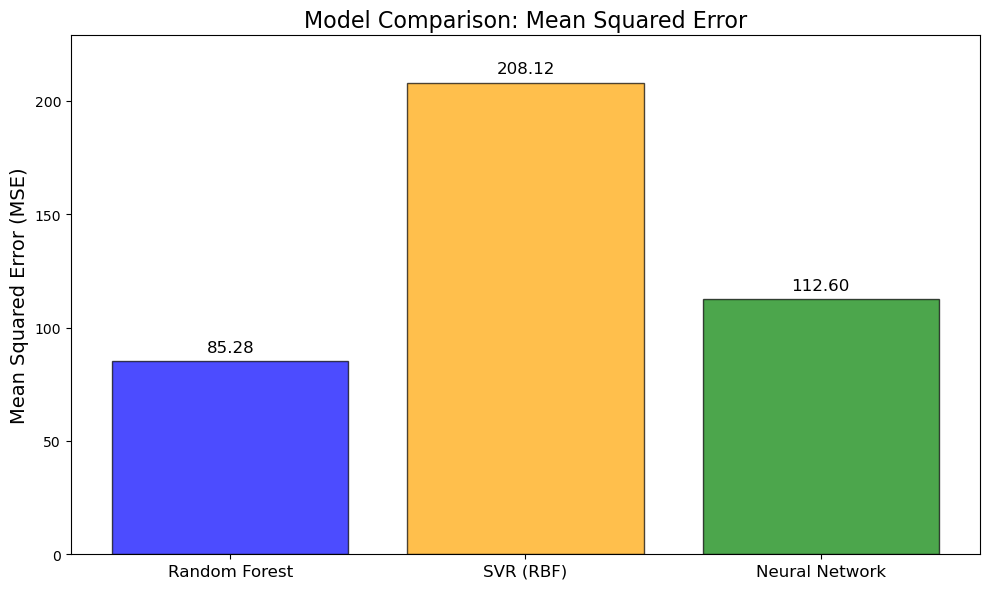

In [223]:
import matplotlib.pyplot as plt
import numpy as np

# Example MSE values for different models
models = ["Random Forest", "SVR (RBF)", "Neural Network"]
mse_values = [85.28, 208.12, 112.6]  # Replace these variables with your computed MSE values

# Create the bar graph
plt.figure(figsize=(10, 6))
bar_positions = np.arange(len(models))
plt.bar(bar_positions, mse_values, color=['blue', 'orange', 'green'], alpha=0.7, edgecolor='black')

# Add labels and title
plt.xticks(bar_positions, models, fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)
plt.title("Model Comparison: Mean Squared Error", fontsize=16)
plt.ylim(0, max(mse_values) * 1.1)  # Adjust y-axis to have some margin
for i, mse in enumerate(mse_values):
    plt.text(i, mse + 0.02 * max(mse_values), f"{mse:.2f}", ha='center', fontsize=12)

# Show and save the plot
plt.tight_layout()
plt.savefig("Model_MSE_Comparison.png")
plt.show()


To conclude, RF is the best amongst non-linear models while Ridge Kernel stands out as the most accurate among the linear models.
In general, we saw outliers due to noises in the data. Hence, I suggest to get rid of those high error data points and retrain the model
for better accuracy. However, this model is not supposed to predict the accurate critical temperature but rather to get an idea of it. Hence,
experimentalist can know which materials they need to focus on during the experimental study based on their standards.